In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

The date one year from the last date in the data set is:  2016-08-23


Text(0, 0.5, 'Precipitation Score (inches)')

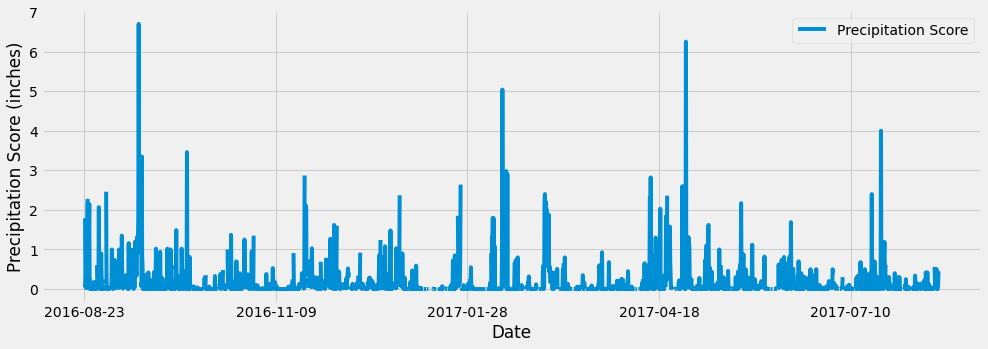

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Starting from the most recent data point in the database

# Calculate the date one year from the last date in data set

date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("The date one year from the last date in the data set is: ", date)

# Perform a query to retrieve the data and precipitation scores

date_and_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date).all()
date_and_scores

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(date_and_scores, columns = ['Date', 'Precipitation Score'])
df.set_index('Date', inplace = True)

# Sort the dataframe by date

df = df.sort_values(['Date'])

# Use Pandas Plotting with Matplotlib to plot the data

image = df.plot(figsize = (15,5))
image.set_ylabel('Precipitation Score (inches)')

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df. describe().round(4)

,Precipitation Score
count,2021.0000
mean,0.1773
std,0.4612
min,0.0000
25%,0.0000
50%,0.0200
75%,0.1300
max,6.7000


Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(station.station).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order

most_active_stations = session.query(measurement.station, \
    func.count(measurement.station)).\
        group_by(measurement.station).\
            order_by(func.count(measurement.station).\
                desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id (USC00519281) from the previous query
#  calculate the lowest, highest, and average temperature

station_temp = session.query(func.min(measurement.tobs),\
    func.max(measurement.tobs),\
        func.avg(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').all()


station_temp_df = pd.DataFrame(station_temp, columns=["Min Temperature", "Max Temperature", "Avg Temperature"])
station_temp_df

,Min Temperature,Max Temperature,Avg Temperature
0,54.0,85.0,71.663781


In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

session.query(measurement.station, measurement.date).\
    filter(measurement.station == 'USC00519281').\
        order_by(measurement.date.desc()).first()

date2 = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
print("The date one year from the last date in the data set is: ", date2)

The date one year from the last date in the data set is:  2016-08-18


In [16]:
temp2 = session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
        filter(measurement.date >= date2).all()
temp2

[('USC00519281', '2016-08-18', 80.0),
 ('USC00519281', '2016-08-19', 79.0),
 ('USC00519281', '2016-08-20', 81.0),
 ('USC00519281', '2016-08-21', 79.0),
 ('USC00519281', '2016-08-22', 78.0),
 ('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC005192

In [17]:
df2 = pd.DataFrame(temp2, columns = ['Station', 'Date', 'Temperature'])
df2.set_index('Date', inplace = True)
df2 = df2.drop(columns = ['Station'])
df2.head()

,Temperature
Date,
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0


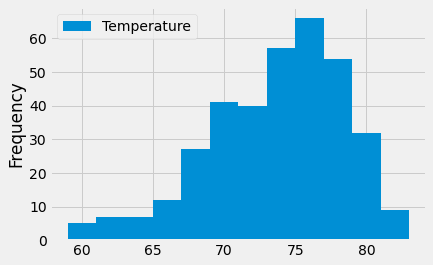

In [29]:
df2.plot.hist(bins = 12)

 Close session

In [19]:
# Close Session (run at the very end!)

session.close()